# Traveling Companions

In this activity you will be taking three separate csvs that were gathered by Tourism Malaysia, merging them together, and then creating charts to visualize a country's change of traveling companions to Malaysia over the course of three years.

### Part 1 - Merging Companions

* You will likely need to perform two different merges over the course of this activity, changing the names of your columns as you go along.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Take in all of our traveler data and read it into pandas
travel_2016 = "../Resources/2016_travelers.csv"
travel_2017 = "../Resources/2017_travelers.csv"
travel_2018 = "../Resources/2018_travelers.csv"

travel_2016_df = pd.read_csv(travel_2016)
travel_2017_df = pd.read_csv(travel_2017)
travel_2018_df = pd.read_csv(travel_2018)


In [3]:
# Merge the first two datasets on "COUNTRY OF NATIONALITY" so that no data is lost (should be 44 rows)
travel_df = pd.merge(travel_2016_df, travel_2017_df, on = 'COUNTRY OF NATIONALITY')
travel_df.head()

,COUNTRY OF NATIONALITY,ALONE_x,WITH SPOUSE_x,WITH CHILDREN_x,WITH FAMILY/RELATIVES_x,STUDENT GROUP_x,WITH FRIENDS_x,WITH BUSINESS ACCOCIATE_x,WITH INCENTIVE GROUP_x,OTHERS_x,ALONE_y,WITH SPOUSE_y,WITH CHILDREN_y,WITH FAMILY/RELATIVES_y,STUDENT GROUP_y,WITH FRIENDS_y,WITH BUSINESS ACCOCIATE_y,WITH INCENTIVE GROUP_y,OTHERS_y
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,20.6,39.4,5.9,22.9,0.2,9.3,1.1,0.1,0.5
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,23.2,17.8,4.2,11.8,4.4,29.3,4.8,2.7,1.8
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,10.4,28.0,3.9,34.9,0.9,15.5,2.7,2.3,1.4
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,6.8,21.2,2.2,54.5,0.1,14.2,0.8,0.0,0.0
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,3.5,7.6,0.2,40.0,0.2,46.4,1.9,0.1,0.2


In [4]:
# Rename our _x columns to "2016 Alone", "2016 With Spouse", "2016 With Children", "2016 With Family/Relatives",
# "2016 Student Group", "2016 With Friends", "2016 With Business Associate", "2016 With Incentive Group",
# and "2016 Others"
travel_df = travel_df.rename(columns={'ALONE_x': '2016 Alone', 'WITH SPOUSE_x': '2016 With Spouse', 'WITH CHILDREN_x': '2016 With Children', 'WITH FAMILY/RELATIVES_x': '2016 With Family/Relatives', 'STUDENT GROUP_x': '2016 Student Group', 'WITH FRIENDS_x': '2016 With Friends', 'WITH BUSINESS ACCOCIATE_x': '2016 With Business Associate', 'WITH INCENTIVE GROUP_x': '2016 With Incentive Group', 'OTHERS_x': '2016 Others'})
# Rename our _y columns to "2016 Alone", "2016 With Spouse", "2016 With Children", "2016 With Family/Relatives",
# "2016 Student Group", "2016 With Friends", "2016 With Business Associate", "2016 With Incentive Group",
# and "2016 Others"
travel_df = travel_df.rename(columns={'ALONE_y': '2017 Alone', 'WITH SPOUSE_y': '2017 With Spouse', 'WITH CHILDREN_y': '2017 With Children', 'WITH FAMILY/RELATIVES_y': '2017 With Family/Relatives', 'STUDENT GROUP_y': '2017 Student Group', 'WITH FRIENDS_y': '2017 With Friends', 'WITH BUSINESS ACCOCIATE_y': '2017 With Business Associate', 'WITH INCENTIVE GROUP_y': '2017 With Incentive Group', 'OTHERS_y': '2017 Others'})

travel_df.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,2017 Alone,2017 With Spouse,2017 With Children,2017 With Family/Relatives,2017 Student Group,2017 With Friends,2017 With Business Associate,2017 With Incentive Group,2017 Others
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,20.6,39.4,5.9,22.9,0.2,9.3,1.1,0.1,0.5
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,23.2,17.8,4.2,11.8,4.4,29.3,4.8,2.7,1.8
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,10.4,28.0,3.9,34.9,0.9,15.5,2.7,2.3,1.4
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,6.8,21.2,2.2,54.5,0.1,14.2,0.8,0.0,0.0
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,3.5,7.6,0.2,40.0,0.2,46.4,1.9,0.1,0.2


In [5]:
# Merge our newly combined dataframe with the 2018 dataframe
travel_df = pd.merge(travel_df, travel_2018_df, how = 'outer', on = 'COUNTRY OF NATIONALITY')
travel_df.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,...,2017 Others,ALONE,WITH SPOUSE,WITH CHILDREN,WITH FAMILY/RELATIVES,STUDENT GROUP,WITH FRIENDS,WITH BUSINESS ACCOCIATE,WITH INCENTIVE GROUP,OTHERS
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,...,0.5,16.9,34.6,5.0,25.3,0.7,14.4,0.6,2.5,0.1
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,...,1.8,20.6,6.7,7.2,33.5,1.2,29.8,0.4,0.4,0.2
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,...,1.4,11.3,31.1,4.0,34.4,1.1,14.7,0.7,2.3,0.5
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,...,0.0,17.5,28.1,2.0,40.0,0.1,11.6,0.4,0.1,0.1
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,...,0.2,5.5,20.6,0.7,29.5,0.5,39.2,1.6,1.6,0.7


In [6]:
# Rename "ALONE", "WITH SPOUSE", "WITH CHILDREN", "WITH FAMILY/RELATIVES", "STUDENT GROUP", "WITH FRIENDS",
# "WITH BUSINESS ACCOCIATE","WITH INCENTIVE GROUP", "OTHERS" to 
# "2018 Alone", "2018 With Spouse", "2018 With Children", "2018 With Family/Relatives", "2018 Student Group", 
# "2018 With Friends", "2018 With Business Associate", "2018 With Incentive Group", and "2018 Others"
travel_df = travel_df.rename(columns={'ALONE': '2018 Alone', 'WITH SPOUSE': '2018 With Spouse', 'WITH CHILDREN': '2018 With Children', 'WITH FAMILY/RELATIVES': '2018 With Family/Relatives', 'STUDENT GROUP': '2018 Student Group', 'WITH FRIENDS': '2018 With Friends', 'WITH BUSINESS ACCOCIATE': '2018 With Business Associate', 'WITH INCENTIVE GROUP': '2018 With Incentive Group', 'OTHERS': '2018 Others'})

travel_df.head()

,COUNTRY OF NATIONALITY,2016 Alone,2016 With Spouse,2016 With Children,2016 With Family/Relatives,2016 Student Group,2016 With Friends,2016 With Business Associate,2016 With Incentive Group,2016 Others,...,2017 Others,2018 Alone,2018 With Spouse,2018 With Children,2018 With Family/Relatives,2018 Student Group,2018 With Friends,2018 With Business Associate,2018 With Incentive Group,2018 Others
0,SINGAPORE,18.6,35.5,3.9,23.7,0.1,14.7,2.2,0.4,0.8,...,0.5,16.9,34.6,5.0,25.3,0.7,14.4,0.6,2.5,0.1
1,THAILAND,30.1,16.7,0.9,12.0,3.1,30.2,4.8,1.0,1.2,...,1.8,20.6,6.7,7.2,33.5,1.2,29.8,0.4,0.4,0.2
2,INDONESIA,12.9,24.6,3.8,37.9,0.9,14.9,2.1,1.6,1.2,...,1.4,11.3,31.1,4.0,34.4,1.1,14.7,0.7,2.3,0.5
3,BRUNEI,10.2,24.9,2.2,44.5,0.0,16.2,1.1,0.1,0.7,...,0.0,17.5,28.1,2.0,40.0,0.1,11.6,0.4,0.1,0.1
4,PHILIPPINES,13.9,27.5,1.5,15.0,5.5,34.1,1.1,0.0,1.5,...,0.2,5.5,20.6,0.7,29.5,0.5,39.2,1.6,1.6,0.7


### Part 2

In [7]:
# Check the mean of the columns
travel_df.mean()

C:\Users\Peter Solis\AppData\Local\Temp\ipykernel_16028\1438682779.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  travel_df.mean()


2016 Alone                      15.890909
2016 With Spouse                34.202273
2016 With Children               1.275000
2016 With Family/Relatives      20.434091
2016 Student Group               0.715909
2016 With Friends               20.300000
2016 With Business Associate     3.088636
2016 With Incentive Group        1.065909
2016 Others                      0.768182
2017 Alone                      12.447727
2017 With Spouse                32.413636
2017 With Children               1.184091
2017 With Family/Relatives      27.325000
2017 Student Group               0.647727
2017 With Friends               22.202273
2017 With Business Associate     1.663636
2017 With Incentive Group        0.995455
2017 Others                      1.106818
2018 Alone                       7.477273
2018 With Spouse                31.693182
2018 With Children               1.325000
2018 With Family/Relatives      28.638636
2018 Student Group               1.179545
2018 With Friends               25

In [20]:
# Reduce columns where mean of traveling companions is > 1 across all years
reduced_travel_df = travel_df[['COUNTRY OF NATIONALITY',
                               '2016 Alone',
                               '2016 With Spouse',
                               '2016 With Children',
                               '2016 With Family/Relatives',
                               '2016 With Friends',
                               '2016 With Business Associate',
                               '2017 Alone',
                               '2017 With Spouse',
                               '2017 With Children',
                               '2017 With Family/Relatives',
                               '2017 With Friends',
                               '2017 With Business Associate',
                               '2018 Alone',
                               '2018 With Spouse',
                               '2018 With Children',
                               '2018 With Family/Relatives',
                               '2018 With Friends',
                               '2018 With Business Associate']]
reduced_travel_df = reduced_travel_df.set_index('COUNTRY OF NATIONALITY')

### Part 3

* Create 3 variables, one for each country to chart.

* Create a variable for the type of traveling companion to compare.

* Store each country's percentage of travelers for the chosen traveling companion over time in 3 variables (one for each country)

* Create a line chart that will plot the comparison of each country's percentage of travelers with the chosen traveling companion from 2016 to 2018

In [21]:
# countries to chart
country_1 = 'USA'
country_2 = 'CANADA'
country_3 = 'AUSTRALIA'

# type of companion
companion = 'With Business Associate'

In [22]:
# get data
c1_stats = reduced_travel_df.loc[country_1, ['2016 ' + companion,
                                            '2017 ' + companion,
                                            '2018 ' + companion]]
c2_stats = reduced_travel_df.loc[country_2, ['2016 ' + companion,
                                            '2017 ' + companion,
                                            '2018 ' + companion]]
c3_stats = reduced_travel_df.loc[country_3, ['2016 ' + companion,
                                            '2017 ' + companion,
                                            '2018 ' + companion]]

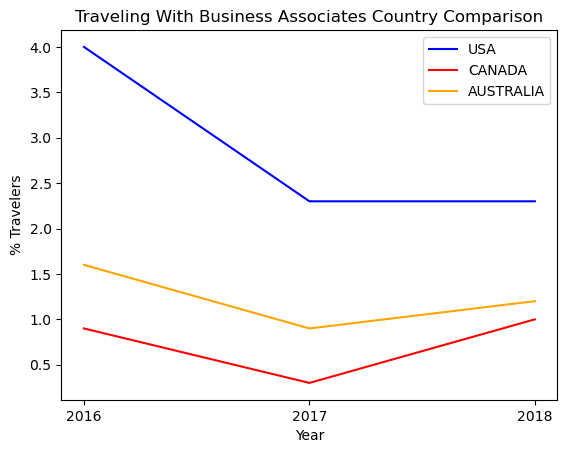

In [35]:
# Create a list of the years that we will use as our x axis
x = ['2016', '2017', '2018']

# Plot our line that will be used to track the first country's traveling companion percentage over the years
plt.plot(x, c1_stats, color='blue', label=country_1)

# Plot our line that will be used to track the second country's traveling companion percentage over the years
plt.plot(x, c2_stats, color='red', label=country_2)

# Plot our line that will be used to track the third country's traveling companion percentage over the years
plt.plot(x, c3_stats, color='orange', label=country_3)

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc='best')
plt.title('Traveling With Business Associates Country Comparison')
plt.xlabel('Year')
plt.ylabel('% Travelers')

# Print our chart to the screen
plt.show()